In [84]:
import pandas as pd
import numpy as np
#from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels import stats
import math
from collections import namedtuple
import pickle

In [85]:
final_df = pd.read_csv("k_modes_manual_clusters_with_distracted.csv")

### Adjust Interstate Hwy Labels

In [86]:
final_df['interstate hwy'] = final_df['interstate hwy'].astype(str)
final_df.loc[(final_df['interstate hwy'] == '0.0'), 'interstate hwy'] = 'N'
final_df.loc[(final_df['interstate hwy'] == '1.0'), 'interstate hwy'] = 'Y'
final_df.loc[(final_df['interstate hwy'] == '9.0'), 'interstate hwy'] = 'U/K'

### Adjust Population Class Labels
#### Numbers in "population class" labels denote population values of thousands

In [87]:
final_df['population class'] = final_df['population class'].astype(str)
final_df.loc[(final_df['population class'] == '1.0'), 'population class'] = '25_50'
final_df.loc[(final_df['population class'] == '2.0'), 'population class'] = '50_100'
final_df.loc[(final_df['population class'] == '3.0'), 'population class'] = '100+'
final_df.loc[(final_df['population class'] == '8.0'), 'population class'] = 'other'
final_df.loc[(final_df['population class'] == '9.0'), 'population class'] = 'U/K'

### Adjust Work Zone Labels

In [88]:
final_df['work zone'] = final_df['work zone'].astype(str)
final_df.loc[(final_df['work zone'] == '0.0'), 'work zone'] = 'none'
final_df.loc[(final_df['work zone'] == '1.0'), 'work zone'] = 'construction'
final_df.loc[(final_df['work zone'] == '2.0'), 'work zone'] = 'maintenance'
final_df.loc[(final_df['work zone'] == '3.0'), 'work zone'] = 'utility'
final_df.loc[(final_df['work zone'] == '4.0'), 'work zone'] = 'work_zone'
final_df.loc[(final_df['work zone'] == '8.0'), 'work zone'] = 'N/R'
final_df.loc[(final_df['work zone'] == '7.0'), 'work zone'] = 'N/R'

### Adjust Day of Week Labels

In [89]:
final_df['dow'] = final_df['dow'].astype(str)
final_df.loc[final_df['dow'] == '1.0', 'dow'] = "sun"
final_df.loc[final_df['dow'] == '2.0', 'dow'] = "mon"
final_df.loc[final_df['dow'] == '3.0', 'dow'] = "tue"
final_df.loc[final_df['dow'] == '4.0', 'dow'] = "wed"
final_df.loc[final_df['dow'] == '5.0', 'dow'] = "thu"
final_df.loc[final_df['dow'] == '6.0', 'dow'] = "fri"
final_df.loc[final_df['dow'] == '7.0', 'dow'] = "sat"
final_df.loc[final_df['dow'] == '9.0', 'dow'] = "U/K"

### Adjust Specific Location Labels

In [90]:
final_df['specific location'] = final_df['specific location'].astype(str)
final_df.loc[(final_df['specific location'] == '1.0'), 'specific location'] = 'non_junc'
final_df.loc[(final_df['specific location'] == '2.0'), 'specific location'] = 'inter'
final_df.loc[(final_df['specific location'] == '3.0'), 'specific location'] = 'inter'
final_df.loc[(final_df['specific location'] == '4.0'), 'specific location'] = 'other'
final_df.loc[(final_df['specific location'] == '5.0'), 'specific location'] = 'entrance_exit_ramp'
final_df.loc[(final_df['specific location'] == '6.0'), 'specific location'] = 'other'
final_df.loc[(final_df['specific location'] == '7.0'), 'specific location'] = 'crossover'
final_df.loc[(final_df['specific location'] == '8.0'), 'specific location'] = 'other'
final_df.loc[(final_df['specific location'] == '16.0'), 'specific location'] = 'other'
final_df.loc[(final_df['specific location'] == '17.0'), 'specific location'] = 'accel_decel_ln'
final_df.loc[(final_df['specific location'] == '18.0'), 'specific location'] = 'thru_rd'
final_df.loc[(final_df['specific location'] == '19.0'), 'specific location'] = 'other_loc_interchng'
final_df.loc[(final_df['specific location'] == '98.0'), 'specific location'] = 'N/R'
final_df.loc[(final_df['specific location'] == '99.0'), 'specific location'] = 'U/K'
final_df = final_df.loc[final_df['specific location'] != '20.0']

### Adjust Month Labels

In [91]:
final_df['month'] = final_df['month'].astype(str)
final_df.loc[(final_df['month'] == '1.0'), 'month'] = 'jan'
final_df.loc[(final_df['month'] == '2.0'), 'month'] = 'feb'
final_df.loc[(final_df['month'] == '3.0'), 'month'] = 'mar'
final_df.loc[(final_df['month'] == '4.0'), 'month'] = 'apr'
final_df.loc[(final_df['month'] == '5.0'), 'month'] = 'may'
final_df.loc[(final_df['month'] == '6.0'), 'month'] = 'jun'
final_df.loc[(final_df['month'] == '7.0'), 'month'] = 'jul'
final_df.loc[(final_df['month'] == '8.0'), 'month'] = 'aug'
final_df.loc[(final_df['month'] == '9.0'), 'month'] = 'sep'
final_df.loc[(final_df['month'] == '10.0'), 'month'] = 'oct'
final_df.loc[(final_df['month'] == '11.0'), 'month'] = 'nov'
final_df.loc[(final_df['month'] == '12.0'), 'month'] = 'dec'

In [92]:
final_df.to_csv("k_modes_manual_clusters_with_distracted.csv")

In [93]:
def group_pct(df, feature_of_interest, cluster_col):
    group_feature_of_interest = df.groupby([cluster_col, feature_of_interest]).agg({'count' : 'sum'})
    cluster_grouped = df.groupby([cluster_col]).agg({'count' : 'sum'})
    group_feature_pct = group_feature_of_interest.div(cluster_grouped, level = cluster_col) * 100
    return (group_feature_pct.reset_index())

In [94]:
features_of_interest = ['distracted_binary', 'age', 'sex', 
                       'dow', 'hr', 'interstate hwy', 'population class', 
                       'collision', 'injury', 'month', 'specific location',
                       'relation to road', 'intersection type', 'work zone', 
                       'speed limit', 'vehicle occupants', 'region']

In [95]:
df_groupby = group_pct(final_df, 'distracted_binary', "6")

In [96]:
df_groupby

,6,distracted_binary,count
0,0,0,89.626629
1,0,1,10.373371
2,1,0,89.721336
3,1,1,10.278664
4,2,0,88.428365
5,2,1,11.571635
6,3,0,88.469215
7,3,1,11.530785
8,4,0,89.409035
9,4,1,10.590965


In [97]:
def z_prop_feature_of_interest(df, difference_column, difference_value, column_of_interest, value_of_interest):
    df1_sample = df.loc[(df[difference_column] == difference_value)]
    df2_sample = df.loc[(df[difference_column] != difference_value)]
    df1_true = df.loc[(df[difference_column] == difference_value) & (df[column_of_interest] == value_of_interest)]
    df2_true = df.loc[(df[difference_column] != difference_value) & (df[column_of_interest] == value_of_interest)]
    # create numpy array of rentals one standard deviation over fair market rent for respective cities
    count = np.array([len(df1_true), len(df2_true)])
    # create a numpy array of total number of rentals in saint paul and minneapolis
    nobs = np.array([len(df1_sample), len(df2_sample)])
    # run proportions z test assuming null hypothesis is true, hence "larger" as argument for alternative
    # that minneapolis has a greater proportion of over fair market rent 
    #z, p = proportions_ztest(count, nobs, alternative = 'larger')
    z, p = sm.stats.proportions_ztest(count, nobs, alternative = 'larger')
    return (z, p)

In [98]:
statistical_tests_list = []

In [99]:
distracted_binary_z_prop = []
for i in range(0,6):
    z, p = z_prop_feature_of_interest(final_df, "distracted_binary", 1, "6", i)
    statistical_tests_list.append((i, z, p, .05))

In [100]:
result = stats.multitest.multipletests([p[2] for p in distracted_binary_z_prop], .05, 'bonferroni')

ZeroDivisionError: float division by zero

In [ ]:
distracted_binary_z_prop

In [ ]:
result

In [ ]:
final_df['6'].value_counts()

In [ ]:
with open('k_modes_centroids.pickle', 'rb') as f:
    k_modes_centroids = pickle.load(f)

In [ ]:
k_modes_centroids

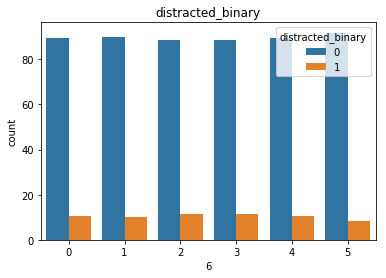

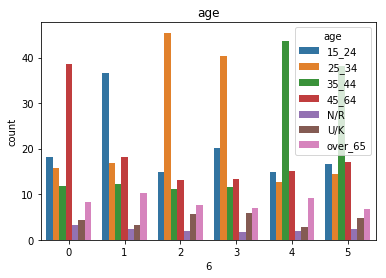

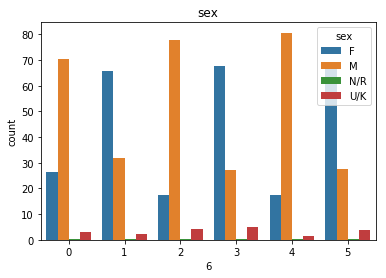

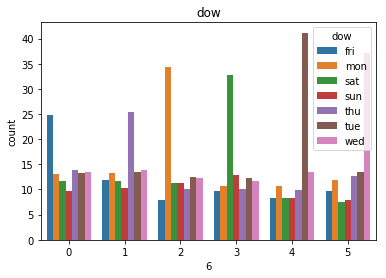

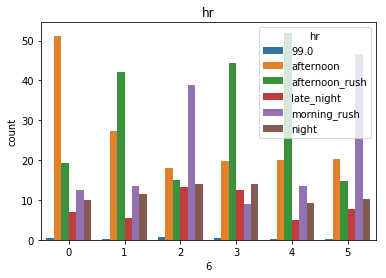

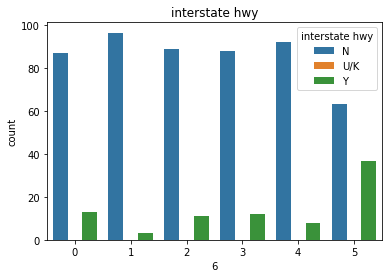

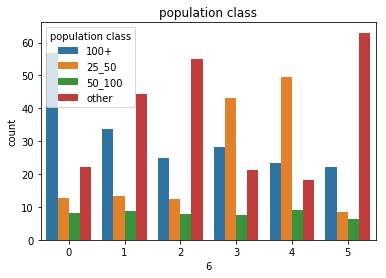

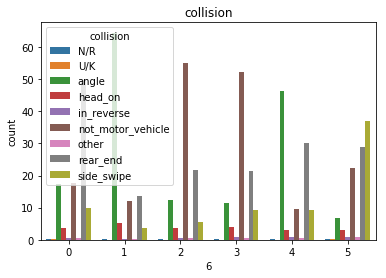

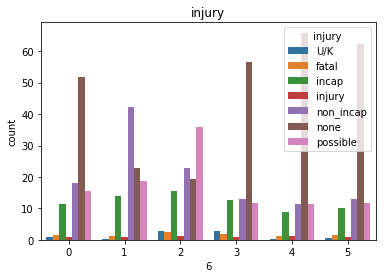

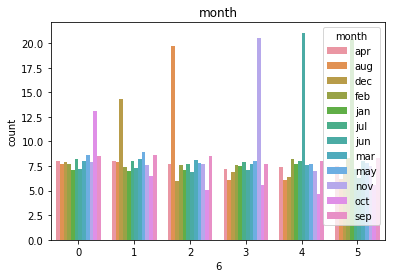

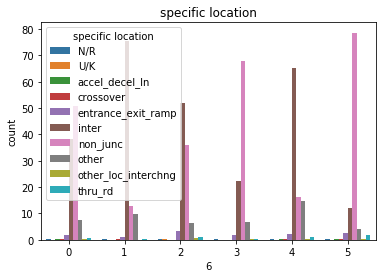

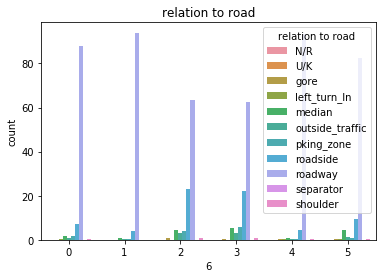

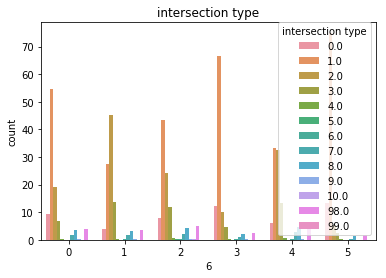

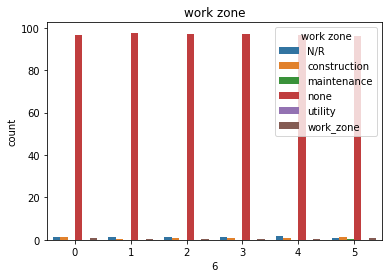

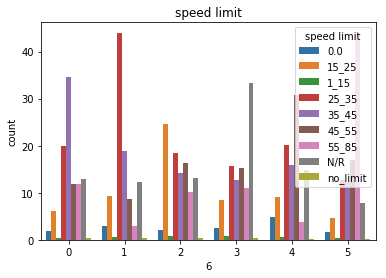

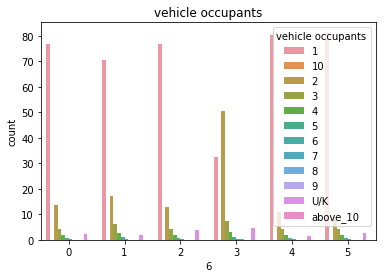

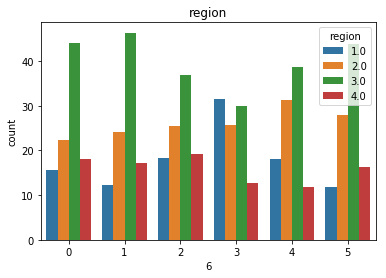

In [101]:
for feature_of_interest in features_of_interest:
    df_groupby = group_pct(final_df, feature_of_interest, "6")
    plt.figure()
    plt.title(feature_of_interest)
    sns.barplot(x="6", y="count", hue=feature_of_interest, data=df_groupby)
    

In [102]:
final_df['hr'].value_counts()

afternoon         191987
afternoon_rush    148397
morning_rush       93186
night              58116
late_night         39871
99.0                1911
Name: hr, dtype: int64